# Get quick insights about the species you're working on!

Retrieve useful stats using AssemblyInfo for desired species.

In [2]:
!pip3 install assemblyinfo

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# import GenomeInfo from the package!

import matplotlib.pyplot as plt
import pandas as pd
import assemblyinfo

In [4]:
# use the connect() method to retrieve our database!

db = assemblyinfo.connect()

In [8]:
# you can easily see what's inside the database by just running .info()

db.info()

'Genome Information:\n===================\nSpecies:\n  - caenorhabditis_elegans, homo_sapiens, mus_musculus, drosophila_melanogaster, danio_rerio, bos_taurus, gallus_gallus, canis_lupus_familiaris\n\nCommon Names:\n  - celegans, human, mouse, fruitfly, zebrafish, cow, chicken, dog\n\nAssemblies (UCSC):\n  - ce11, ce6, hg19, hg38, hg17, hg18, mm9, mm10, mm39, mm6, mm7, mm8, dm3, dm6, danRer6, danRer7, danRer10, danRer11, danRer5, bosTau9, galGal7, canFam4, hs1, canFam2, canFam3, canFam6, ROS_Cfam_1.0, galGal3, galGal4, galGal5, galGal6, canFam5\n\nAssemblies (NCBI):\n  - WS144, WBcel215, WBcel235, WS190, WS195, GRCh37, GRCh38, NCBI35, NCBI36, MGSCv37, GRCm38, GRCm39, MGSCv34, MGSCv35, MGSCv36, Release_5, Release_6, Release_6_plus_ISO1_MT, Zv8, Zv9, GRCz10, GRCz11, Zv7, ARS-UCD1.1, ARS-UCD1.2, ARS-UCD1.3, ARS-UCD2.0, bGalGal1.mat.broiler.GRCg7b, UU_Cfam_GSD_1.0, T2T-CHM13, ASM3317019v1, ASM3317019v2, CanFam2.0, CanFam3.1, Dog10K_Boxer_Tasha, ROS_Cfam_1.0, Gallus_gallus-2.1, Gallus_gallus

In [15]:
# for this example, we are going to use one of the dog assemblies as our model!

df = db.assembly_info("canFam6", roles=["assembled"], units=["primary"])

In [26]:
# we will extract the ungapped length of each assembled and primary chromosomes

ungapped_lengths = df.seqinfo["all-ungapped-length"]

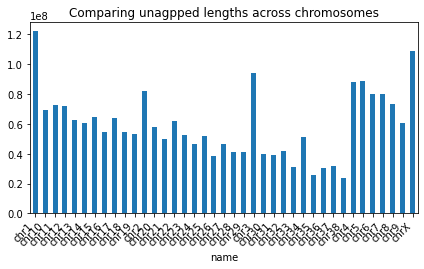

In [28]:
# now, we are going to plot it!

ax = (
    ungapped_lengths
    .plot(kind='bar', legend=False, title="Comparing unagpped lengths across chromosomes")
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()